### Simple EDA 

In [8]:
from utils import (read_twitter_file,
                   create_datasets)
import pandas as pd
from matplotlib import pyplot as pyplot
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
## create dataset with 100_000 samples
df = create_datasets(sub_sampling=10_000, return_type="df")

In [15]:
df

,labels,tweet
0,1.0,you doesn't care about my feelings but when yo...
1,1.0,"going to follow some new people , retweet if y..."
2,0.0,syndresi i . n . r . h . ( rock progressivo it...
3,0.0,happy birthday david tennant . i miss him as t...
4,0.0,feeling some kind of way smh
...,...,...
9995,1.0,watching crazy / beautiful i < 3 this movie
9996,1.0,"spending da day in b-more with "" her "" ahhh ca..."
9997,1.0,finally in a good mood sleeepp
9998,0.0,"loool wai boring . "" <user> i hate it when my ..."


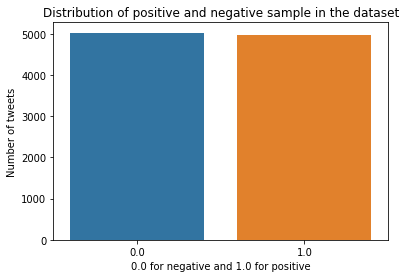

In [16]:
g = sns.countplot(data=df, x="labels")
g.set_title("Distribution of positive and negative sample in the dataset")
g.set_xlabel("0.0 for negative and 1.0 for positive")
g.set_ylabel("Number of tweets");

In [20]:
from transformers import AutoTokenizer

BERT_MODEL = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL, batch_size=16)

df["embeddings"] = df["tweet"].progress_apply(lambda x : tokenizer(x, return_tensors="pt", truncation=True)["input_ids"])

  0%|          | 0/10000 [00:00<?, ?it/s]

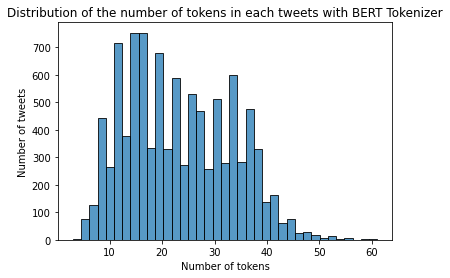

In [27]:
df["nb_tokens"] = df["embeddings"].apply(lambda x : x.size()[1])
g = sns.histplot(data=df, x='nb_tokens')
g.set_title("Distribution of the number of tokens in each tweets with BERT Tokenizer")
g.set_xlabel("Number of tokens")
g.set_ylabel("Number of tweets");